In [1]:
import torch
from torchvision.models import resnet50
from torchvision.models import ResNet50_Weights
from src.utils import create_dataset, compare_saliency_methods
from src.grads import BaseGrad, SmoothGrad, IntegratedGradients


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
image_folder = 'data'
images_dataset = create_dataset(image_folder, device=device)

# Load a pretrained ResNet model
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
model.eval()
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

/opt/conda/lib/python3.11/site-packages/torch/autograd/graph.py:825: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at ../aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


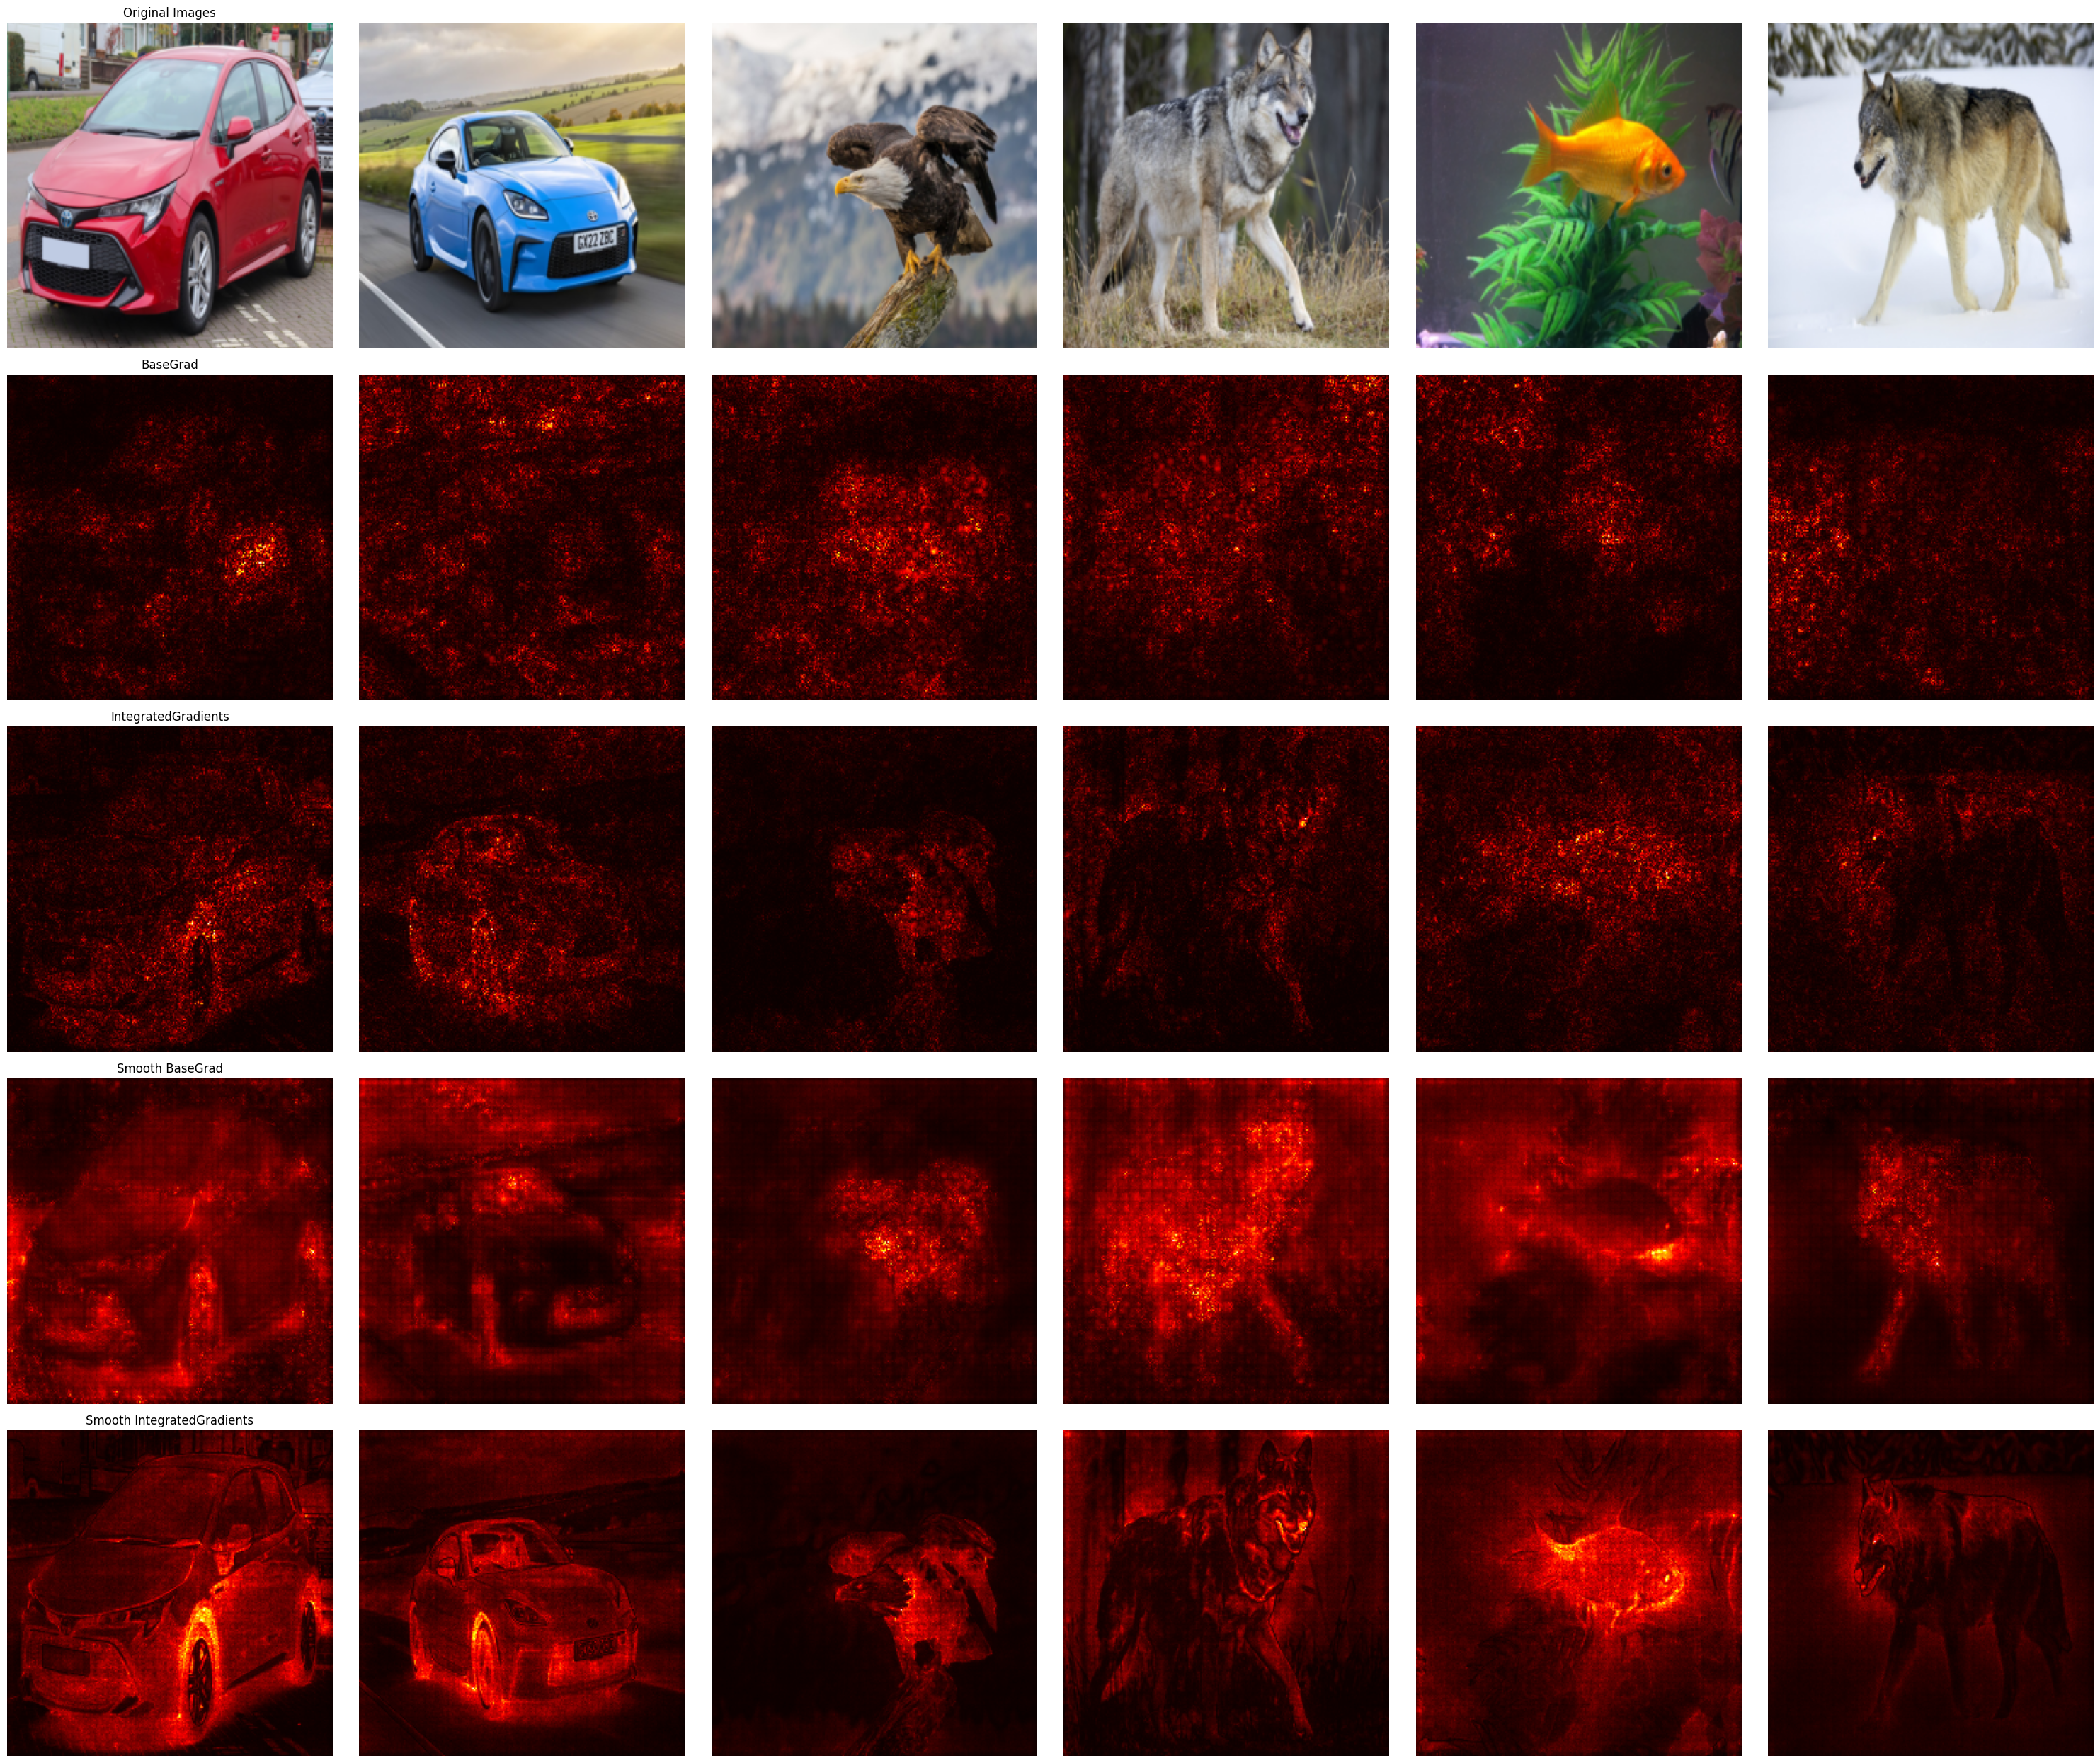

In [3]:
# Initialize saliency map generators
saliency_generator = BaseGrad(model)
integrated_gradients = IntegratedGradients(model)
smooth_grad = SmoothGrad(saliency_generator, n_samples=100, std=0.3)
smooth_IG = SmoothGrad(integrated_gradients, n_samples=30, std=0.3)
    
compare_saliency_methods(
    images_dataset,
    [saliency_generator, integrated_gradients],
    [smooth_grad, smooth_IG],
    figsize=(30, 25)
)